<a href="https://colab.research.google.com/github/Manusree1324/NLP/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns: ['text', 'Emotion']

✅ Using text column: text, label column: Emotion

Classes: ['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']
Number of Classes: 13

Training samples: 97306, Test samples: 24327

=== Model Summary ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


=== Starting Model Training ===
Epoch 1/10
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 157s 125ms/step - accuracy: 0.8626 - loss: 0.6755 - val_accuracy: 0.9921 - val_loss: 0.0546 - learning_rate: 0.0010
Epoch 2/10
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 145s 119ms/step - accuracy: 0.9892 - loss: 0.0504 - val_accuracy: 0.9954 - val_loss: 0.0317 - learning_rate: 0.0010
Epoch 3/10
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 140s 115ms/step - accuracy: 0.9946 - loss: 0.0240 - val_accuracy: 0.9958 - val_loss: 0.0412 - learning_rate: 0.0010
Epoch 4/10
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 146s 119ms/step - accuracy: 0.9960 - loss: 0.0168 - val_accuracy: 0.9963 - val_loss: 0.0419 - learning_rate: 0.0010
Epoch 5/10
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 145s 119ms/step - accuracy: 0.9969 - loss: 0.0106 - val_accuracy: 0.9965 - val_loss: 0.0448 - learning_rate: 5.0000e-04
Epoch 6/10
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 144s 118ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9967 - val_loss: 0.0442 - learning_rate: 5.0000e-04
Epoch 7/10


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

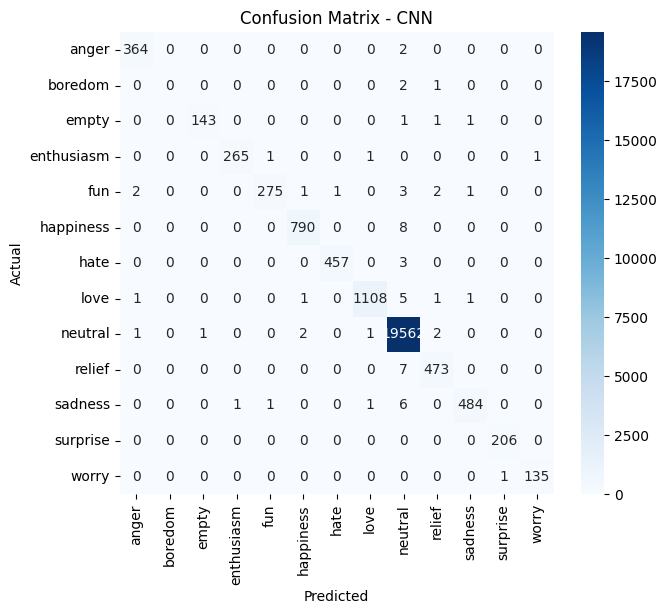

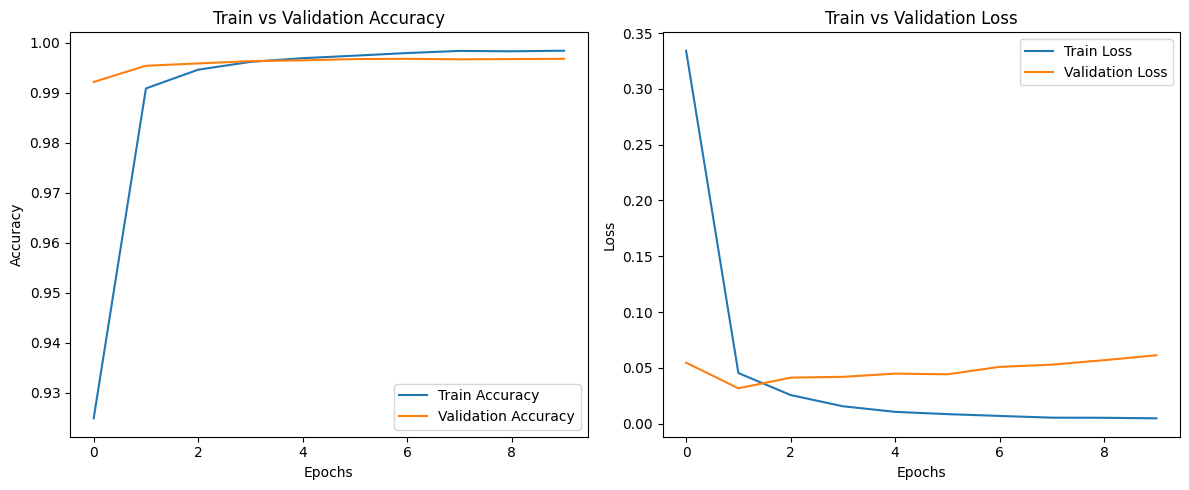


✅ Model saved as cnn_text_emotion_model.h5


In [ ]:
# ==========================
# CNN Text Emotion Recognition (Local CSV)
# ==========================

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# -------------------------
# 1. Load Dataset
# -------------------------
# Assumes the CSV file is in the same directory or a known path
# The 'index_col=0' is added because the provided CSV snippet shows an unnamed index column.
DATA_PATH = "emotion_sentimen_dataset.csv"
df = pd.read_csv(DATA_PATH, index_col=0)
print("Columns:", df.columns.tolist())

# Explicitly set text and label columns
text_col = 'text'
label_col = 'Emotion'
print(f"\n✅ Using text column: {text_col}, label column: {label_col}")

# Clean and prepare the DataFrame
df = df[[text_col, label_col]].dropna().rename(columns={text_col: "text", label_col: "label"})
df['text'] = df['text'].astype(str)

# -------------------------
# 2. Encode Labels
# -------------------------
le = LabelEncoder()
y = le.fit_transform(df['label'])
class_names = list(le.classes_)
num_classes = len(class_names)
print("\nClasses:", class_names)
print("Number of Classes:", num_classes)

# -------------------------
# 3. Split Data
# -------------------------
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text'], y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining samples: {len(X_train_text)}, Test samples: {len(X_test_text)}")

# -------------------------
# 4. Tokenize & Pad
# -------------------------
max_words, max_len = 20000, 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test_text), maxlen=max_len)

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# -------------------------
# 5. CNN Model
# -------------------------
print("\n=== Model Summary ===")
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# -------------------------
# 6. Train Model
# -------------------------
print("\n=== Starting Model Training ===")
es = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,  # Use part of training data for validation
    epochs=10,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)
print("=== Model Training Finished ===")

# -------------------------
# 7. Evaluation
# -------------------------
# Predict probabilities and get the class with the highest probability
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Use the original y_test (not the categorical one) for metrics
y_true = y_test

print("\n=== Evaluation Metrics ===")
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Macro Precision: {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_true, y_pred, average='macro'):.4f}")
print(f"Macro F1 Score: {f1_score(y_true, y_pred, average='macro'):.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# -------------------------
# 8. Confusion Matrix
# -------------------------
plt.figure(figsize=(7, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------
# 9. Train vs Validation Accuracy/Loss
# -------------------------
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Train vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Train vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# -------------------------
# 10. Save Model
# -------------------------
model.save("cnn_text_emotion_model.h5")
print("\n✅ Model saved as cnn_text_emotion_model.h5")

Classes: ['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']

Training samples: 127034, Test samples: 31759

--- Preprocessing for ML Models (TF-IDF) ---
Fitting TF-IDF Vectorizer...
Transforming test data...
TF-IDF matrix shape (Train): (127034, 20000)
XGBoost Training samples: 114330, XGBoost Validation samples: 12704

--- Preprocessing for DL Models (Tokenize & Pad) ---
Padded sequence shape (Train): (127034, 100)

--- Training Model 1: AdaBoost ---
AdaBoost training time: 85.84s

=== Evaluation Metrics: AdaBoost ===
Accuracy: 0.8308
Macro F1 Score: 0.1293

Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00       473
     boredom       0.00      0.00      0.00         4
       empty       0.00      0.00      0.00       197
  enthusiasm       1.00      0.00      0.01       355
         fun       0.00      0.00      0.00       371
   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


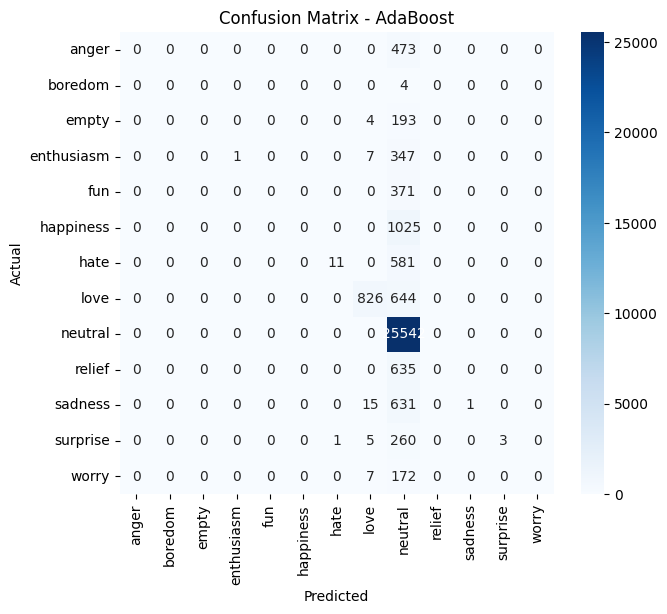


--- Training Model 2: XGBoost ---
Fitting XGBoost model... (This may take some time)
XGBoost training time: 471.12s

=== Evaluation Metrics: XGBoost ===
Accuracy: 0.9775
Macro F1 Score: 0.9116

Classification Report:
               precision    recall  f1-score   support

       anger       0.97      0.79      0.87       473
     boredom       0.67      0.50      0.57         4
       empty       1.00      0.96      0.98       197
  enthusiasm       0.99      0.97      0.98       355
         fun       0.99      0.86      0.92       371
   happiness       0.99      0.89      0.94      1025
        hate       0.99      0.98      0.98       592
        love       1.00      0.93      0.96      1470
     neutral       0.98      1.00      0.99     25542
      relief       0.96      0.60      0.73       635
     sadness       1.00      0.95      0.97       647
    surprise       0.99      0.97      0.98       269
       worry       0.99      0.94      0.97       179

    accuracy           

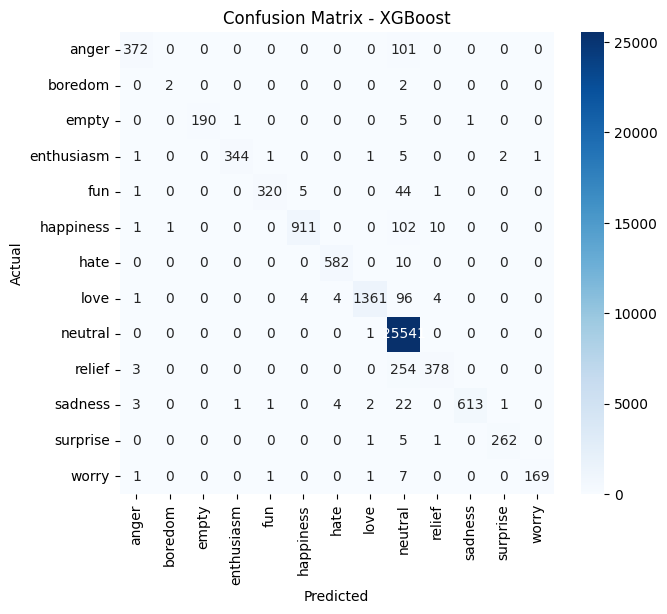


--- Training Model 3: LSTM ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 476s 297ms/step - accuracy: 0.8359 - loss: 0.7458 - val_accuracy: 0.9664 - val_loss: 0.1271 - learning_rate: 0.0010
Epoch 2/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 504s 298ms/step - accuracy: 0.9698 - loss: 0.1180 - val_accuracy: 0.9934 - val_loss: 0.0412 - learning_rate: 0.0010
Epoch 3/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 470s 296ms/step - accuracy: 0.9907 - loss: 0.0458 - val_accuracy: 0.9953 - val_loss: 0.0313 - learning_rate: 0.0010
Epoch 4/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 499s 294ms/step - accuracy: 0.9944 - loss: 0.0271 - val_accuracy: 0.9958 - val_loss: 0.0284 - learning_rate: 0.0010
Epoch 5/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 466s 293ms/step - accuracy: 0.9961 - loss: 0.0174 - val_accuracy: 0.9967 - val_loss: 0.0283 - learning_rate: 0.0010
Epoch 6/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 501s 292ms/step - accuracy: 0.9969 - loss: 0.0139 - val_accuracy: 0.9973 - val_loss: 0.0288 - learning_rate: 0.0010
Epoch 7/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 463s 291ms

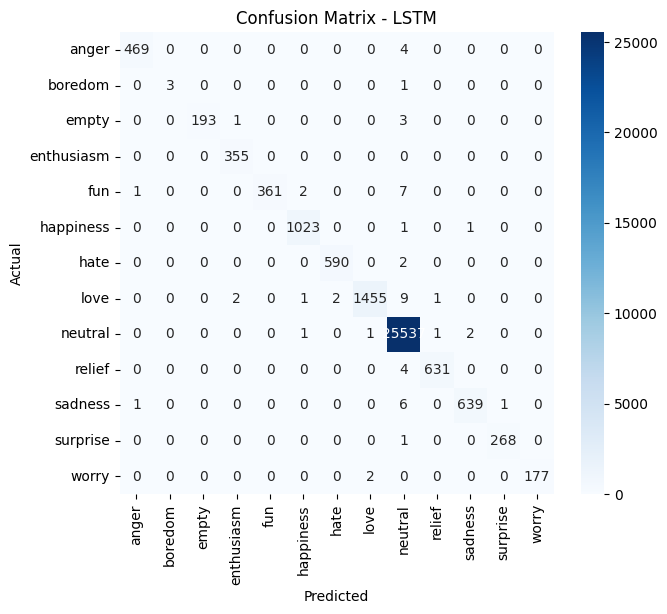


--- Training Model 4: XLSTM (Bidirectional/Stacked) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 1522s 951ms/step - accuracy: 0.8455 - loss: 0.6556 - val_accuracy: 0.9192 - val_loss: 0.2323 - learning_rate: 0.0010
Epoch 2/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 1512s 944ms/step - accuracy: 0.9181 - loss: 0.2470 - val_accuracy: 0.9508 - val_loss: 0.1738 - learning_rate: 0.0010
Epoch 3/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 1514s 940ms/step - accuracy: 0.9486 - loss: 0.1621 - val_accuracy: 0.9753 - val_loss: 0.0868 - learning_rate: 0.0010
Epoch 4/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 1498s 943ms/step - accuracy: 0.9771 - loss: 0.0878 - val_accuracy: 0.9914 - val_loss: 0.0566 - learning_rate: 0.0010
Epoch 5/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 1532s 950ms/step - accuracy: 0.9878 - loss: 0.0511 - val_accuracy: 0.9942 - val_loss: 0.0401 - learning_rate: 0.0010
Epoch 6/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 1507s 940ms/step - accuracy: 0.9919 - loss: 0.0336 - val_accuracy: 0.9956 - val_loss: 0.0350 - learning_rate: 0.0010
Epoch 7/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 1510

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


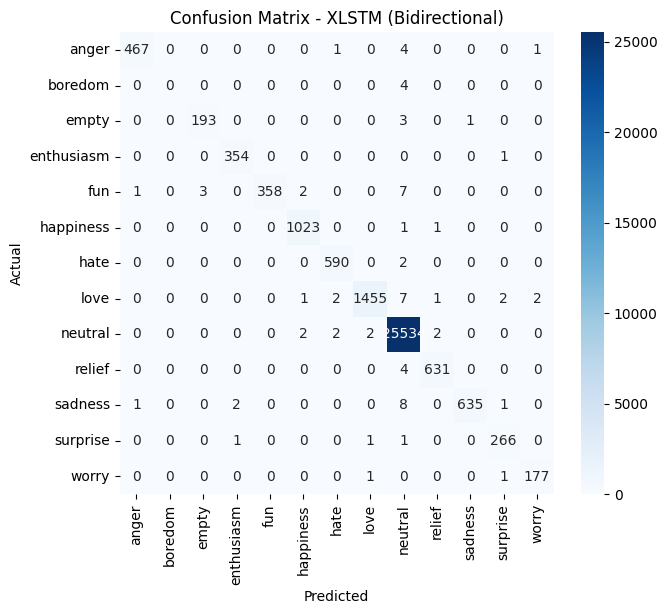


✅ All models trained and evaluated.


In [ ]:
# ==========================
# Emotion Recognition with Multiple Models
# ==========================

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.feature_extraction.text import TfidfVectorizer

# --- ML Models ---
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# --- DL Models ---
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout,
    GlobalMaxPooling1D, Bidirectional
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# ===================================================================
# 1. Load and Prepare Data (Common for all models)
# ===================================================================

# --- Load Dataset ---
DATA_PATH = "emotion_sentimen_dataset.csv"
df = pd.read_csv(DATA_PATH, index_col=0)

# --- Clean and Define Columns ---
text_col = 'text'
label_col = 'Emotion'
df = df[[text_col, label_col]].dropna().rename(columns={text_col: "text", label_col: "label"})
df['text'] = df['text'].astype(str)

# --- Encode Labels ---
le = LabelEncoder()
y = le.fit_transform(df['label'])
class_names = list(le.classes_)
num_classes = len(class_names)
print(f"Classes: {class_names}")

# --- Split Data (Text and Labels) ---
# We split the raw text first for all models
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text'], y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining samples: {len(X_train_text)}, Test samples: {len(X_test_text)}")

# ===================================================================
# 2. Preprocessing for ML Models (AdaBoost, XGBoost)
# ===================================================================
print("\n--- Preprocessing for ML Models (TF-IDF) ---")

# Use TF-IDF to convert text into numerical features
# max_features=20000 to match the vocab size of DL models
tfidf_vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))

print("Fitting TF-IDF Vectorizer...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
print("Transforming test data...")
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)
print(f"TF-IDF matrix shape (Train): {X_train_tfidf.shape}")

# Split training data further for XGBoost validation set
X_train_tfidf_xgb, X_val_tfidf_xgb, y_train_xgb, y_val_xgb = train_test_split(
    X_train_tfidf, y_train, test_size=0.1, random_state=42, stratify=y_train
)
print(f"XGBoost Training samples: {X_train_tfidf_xgb.shape[0]}, XGBoost Validation samples: {X_val_tfidf_xgb.shape[0]}")


# ===================================================================
# 3. Preprocessing for DL Models (LSTM, XLSTM)
# ===================================================================
print("\n--- Preprocessing for DL Models (Tokenize & Pad) ---")

max_words, max_len = 20000, 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

# --- Tokenize and Pad Sequences ---
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test_text), maxlen=max_len)

# --- Create Categorical Labels ---
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
print(f"Padded sequence shape (Train): {X_train_seq.shape}")

# ===================================================================
# 4. Helper Function for Evaluation
# ===================================================================

def evaluate_model(model_name, y_true, y_pred, class_names):
    """Prints a full evaluation report."""
    print(f"\n=== Evaluation Metrics: {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Macro F1 Score: {f1_score(y_true, y_pred, average='macro'):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

    # Plot Confusion Matrix
    plt.figure(figsize=(7, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"confusion_matrix_{model_name.lower()}.png")
    plt.show()

# ===================================================================
# Model 1: AdaBoost
# ===================================================================
print("\n--- Training Model 1: AdaBoost ---")
# Note: AdaBoost can be slow on large, high-dimensional data.
# We use a smaller number of estimators for this example.
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

start_time = time.time()
ada_model.fit(X_train_tfidf, y_train)
print(f"AdaBoost training time: {time.time() - start_time:.2f}s")

y_pred_ada = ada_model.predict(X_test_tfidf)
evaluate_model("AdaBoost", y_test, y_pred_ada, class_names)

# ===================================================================
# Model 2: XGBoost
# ===================================================================
print("\n--- Training Model 2: XGBoost ---")
# XGBoost is generally faster and more accurate than AdaBoost
# It requires labels to be 0 to num_classes-1, which they are (y_train)
xgb_model = XGBClassifier(
    objective='multi:softmax',  # Use 'multi:softmax' for multiclass classification
    num_class=num_classes,
    n_estimators=200,          # Number of trees
    learning_rate=0.1,
    max_depth=6,
    n_jobs=-1,                 # Use all available cores
    random_state=42,
    early_stopping_rounds=10   # Stop if validation score doesn't improve
)

start_time = time.time()
# XGBoost can use a validation set for early stopping
print("Fitting XGBoost model... (This may take some time)")
xgb_model.fit(
    X_train_tfidf_xgb, y_train_xgb,
    eval_set=[(X_val_tfidf_xgb, y_val_xgb)],  # Provide validation set
    verbose=False  # Set verbose=True for details during training
)
print(f"XGBoost training time: {time.time() - start_time:.2f}s")

y_pred_xgb = xgb_model.predict(X_test_tfidf)
evaluate_model("XGBoost", y_test, y_pred_xgb, class_names)

# ===================================================================
# Model 3: LSTM (Long Short-Term Memory)
# ===================================================================
print("\n--- Training Model 3: LSTM ---")
# Callbacks for all DL models
es = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

def create_lstm_model(input_dim, output_dim, input_length, num_classes):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length),
        LSTM(128, dropout=0.2, recurrent_dropout=0.2), # 128-unit LSTM layer
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model(max_words, 128, max_len, num_classes)
lstm_model.summary()

start_time = time.time()
history_lstm = lstm_model.fit(
    X_train_seq, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)
print(f"LSTM training time: {time.time() - start_time:.2f}s")

# Evaluate LSTM
y_pred_prob_lstm = lstm_model.predict(X_test_seq)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)
evaluate_model("LSTM", y_test, y_pred_lstm, class_names)

# ===================================================================
# Model 4: "XLSTM" (Bidirectional Stacked LSTM)
# ===================================================================
print("\n--- Training Model 4: XLSTM (Bidirectional/Stacked) ---")
# This is a more complex model.
# 'return_sequences=True' is needed to pass output sequences to the next LSTM layer.

def create_xlstm_model(input_dim, output_dim, input_length, num_classes):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length),
        Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
        Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)), # Second layer
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

xlstm_model = create_xlstm_model(max_words, 128, max_len, num_classes)
xlstm_model.summary()

start_time = time.time()
history_xlstm = xlstm_model.fit(
    X_train_seq, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)
print(f"XLSTM training time: {time.time() - start_time:.2f}s")

# Evaluate XLSTM
y_pred_prob_xlstm = xlstm_model.predict(X_test_seq)
y_pred_xlstm = np.argmax(y_pred_prob_xlstm, axis=1)
evaluate_model("XLSTM (Bidirectional)", y_test, y_pred_xlstm, class_names)

print("\n✅ All models trained and evaluated.")